## PREDICTING A PULSAR STAR

MODULE 5 FINAL PROJECT

* Student name: Ru Keïn
* Student pace: full time
* Scheduled project review date/time: Feb 11, 2020 @ 4 PM EST
* Instructor name: James Irving, PhD
* Blog post URL:

### `OVERVIEW`

*From Dr. Robert Lyon on Kaggle:*

HTRU2 is a data set which describes **a sample of pulsar candidates collected during the High Time Resolution Universe Survey.**

`Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter.`

As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. `As pulsars rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes.`

Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation. `Thus a potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar.` **However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find.** Here the legitimate pulsar examples are a minority positive class, and spurious examples the majority negative class.

The data set shared here contains **16,259 spurious examples caused by RFI/noise**, and **1,639 real pulsar examples**. Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).

### `Attributes`
Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

    * Mean of the integrated profile.
    * Standard deviation of the integrated profile.
    * Excess kurtosis of the integrated profile.
    * Skewness of the integrated profile.
    * Mean of the DM-SNR curve.
    * Standard deviation of the DM-SNR curve.
    * Excess kurtosis of the DM-SNR curve.
    * Skewness of the DM-SNR curve.
    * Class

HTRU 2 Summary:

    * 17,898 total examples
            * 1,639 positive examples
            * 16,259 negative examples

### `Outline`

    * IMPORT PACKAGES + LIBRARIES
    
    * OBTAIN DATA
    
    * PRE-PROCESSING
    
    * EDA + VISUALIZATIONS
    
    * MODELING:
        * MODEL 1: DECISION TREES
        * MODEL 2: RANDOM FOREST
        * MODEL 3: XGBOOST
        * MODEL 4: GRIDSEARCH CV (ALL)
        
    * INTERPRET RESULTS
    
    * CONCLUSION + SUMMARY
    
    * FUTURE WORK


# `IMPORT`

In [1]:
# Import code packages and libraries
# FLATIRON BOOTCAMP Package Library
#!pip install -U fsds_100719
import fsds_100719 as fs
from fsds_100719.imports import * # will pre-load pd,np,plt,mpl,sns
%matplotlib inline

from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('seaborn-bright')


font_dict={'family':'monospace',
          'size':14}
mpl.rc('font',**font_dict)

#ignore pink warnings
import warnings
warnings.filterwarnings('ignore')
# Allow for large # columns
pd.set_option('display.max_columns', 0)
# pd.set_option('display.max_rows','')



fsds_1007219  v0.7.4 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


['[i] Pandas .iplot() method activated.']


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import average_precision_score, recall_score, precision_score, f1_score

# `OBTAIN`

In [3]:
# Load data
df = pd.read_csv('pulsar_stars.csv')
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


# `SCRUB`

In [4]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [5]:
# RENAMING COLUMNS
df = df.rename(columns={
    ' Mean of the integrated profile':'MEAN_IP',
    ' Standard deviation of the integrated profile':'STD_IP', 
    ' Excess kurtosis of the integrated profile':'KURTOSIS_IP', 
    ' Skewness of the integrated profile':'SKEWNESS_IP', 
    ' Mean of the DM-SNR curve':'MEAN_CURVE', 
    ' Standard deviation of the DM-SNR curve':'STD_CURVE', 
    ' Excess kurtosis of the DM-SNR curve':'KURTOSIS_CURVE',
    ' Skewness of the DM-SNR curve': 'SKEWNESS_CURVE',
    'target_class':'TARGET'})

In [6]:
# PRE-PROCESSING
df.describe()

,MEAN_IP,STD_IP,KURTOSIS_IP,SKEWNESS_IP,MEAN_CURVE,STD_CURVE,KURTOSIS_CURVE,SKEWNESS_CURVE,TARGET
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
MEAN_IP           17898 non-null float64
STD_IP            17898 non-null float64
KURTOSIS_IP       17898 non-null float64
SKEWNESS_IP       17898 non-null float64
MEAN_CURVE        17898 non-null float64
STD_CURVE         17898 non-null float64
KURTOSIS_CURVE    17898 non-null float64
SKEWNESS_CURVE    17898 non-null float64
TARGET            17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [8]:
# Check for null values
df.isna().sum()

MEAN_IP           0
STD_IP            0
KURTOSIS_IP       0
SKEWNESS_IP       0
MEAN_CURVE        0
STD_CURVE         0
KURTOSIS_CURVE    0
SKEWNESS_CURVE    0
TARGET            0
dtype: int64

# `EXPLORE`

Exploratory Data Analysis (EDA)

In [9]:
df.shape

(17898, 9)

In [10]:
df['TARGET'].value_counts()

0    16259
1     1639
Name: TARGET, dtype: int64

## Comparing Attributes

### Hotmap( )

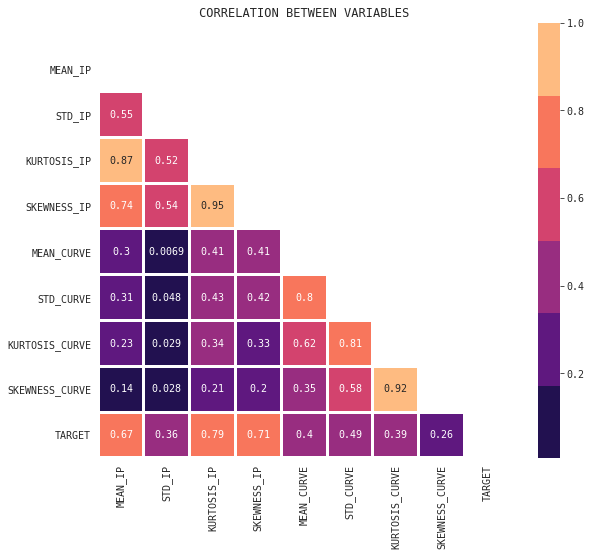

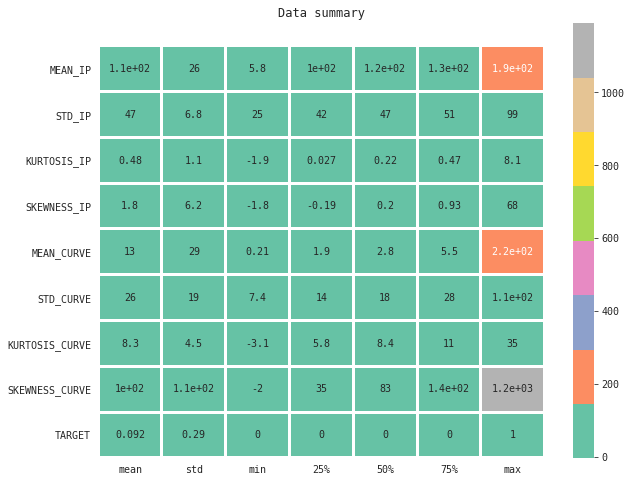

In [11]:
def hotmap(df, figsize=(10,8)):
    
    corr = df.corr()
    fig, ax = plt.subplots(figsize=figsize)
    mask = np.zeros_like(corr, dtype=np.bool)
    idx = np.triu_indices_from(mask)
    mask[idx] = True
    
    sns.heatmap(np.abs(corr),square=True, mask=mask, annot=True,
            cmap=sns.color_palette("magma"),ax=ax,linewidth=2,edgecolor="k")
    ax.set_ylim(len(corr), -.5,.5)
    
    plt.title("CORRELATION BETWEEN VARIABLES")
    plt.show();
    
    #####
    fig, ax = plt.subplots(figsize=figsize)
    
    sns.heatmap(df.describe()[1:].transpose(),annot=True, ax=ax, 
                linecolor="w", linewidth=2,cmap=sns.color_palette("Set2")) #"Set2"
    ax.set_ylim(len(corr), -.5,.5)
    plt.title("Data summary")
    plt.show()

hotmap(df, figsize=(10,8))

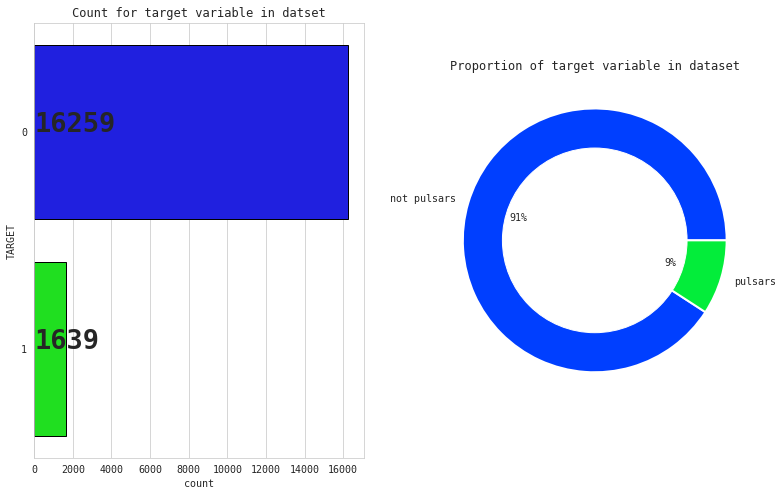

In [12]:
plt.figure(figsize=(13,8))
plt.subplot(121)
ax = sns.countplot(y = df["TARGET"],
                   palette=["b","lime"],
                   linewidth=1,
                   edgecolor="k"*2)
for i,j in enumerate(df["TARGET"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize = 27)
plt.title("Count for target variable in datset")


plt.subplot(122)
plt.pie(df["TARGET"].value_counts().values,
        labels=["not pulsars","pulsars"],
        autopct="%1.0f%%",wedgeprops={"linewidth":2,"edgecolor":"white"})
circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(circ)
plt.subplots_adjust(wspace = .2)
plt.title("Proportion of target variable in dataset")
plt.show()

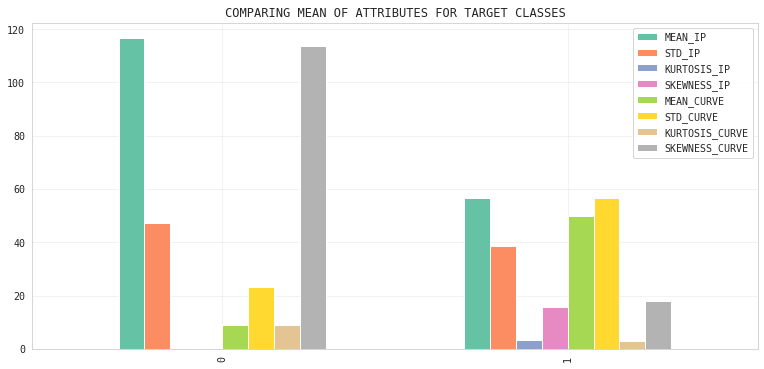

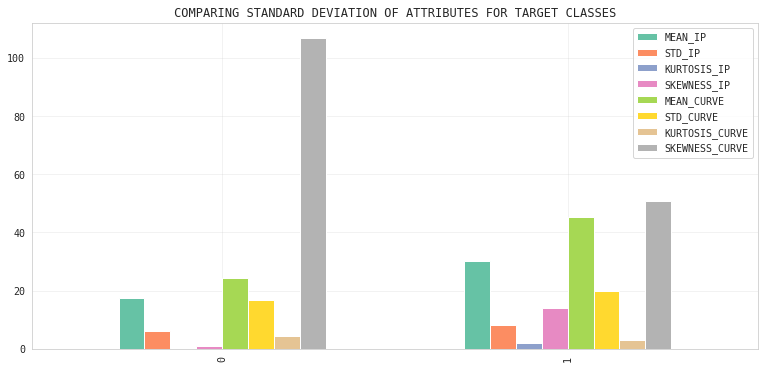

In [13]:
#BARPLOTS
compare = df.groupby('TARGET')[['MEAN_IP', 'STD_IP', 'KURTOSIS_IP', 'SKEWNESS_IP',
                                        'MEAN_CURVE', 'STD_CURVE', 'KURTOSIS_CURVE',
                                        'SKEWNESS_CURVE']].mean().reset_index()


compare = compare.drop('TARGET', axis=1)

compare.plot(kind="bar",width=.6,figsize=(13,6),colormap="Set2")
plt.grid(True,alpha=.3)
plt.title("COMPARING MEAN OF ATTRIBUTES FOR TARGET CLASSES")

compare1 = df.groupby('TARGET')[['MEAN_IP', 'STD_IP', 'KURTOSIS_IP', 'SKEWNESS_IP',
                                        'MEAN_CURVE', 'STD_CURVE', 'KURTOSIS_CURVE',
                                        'SKEWNESS_CURVE']].std().reset_index()
compare1 = compare1.drop('TARGET',axis=1)
compare1.plot(kind="bar",width=.6,figsize=(13,6),colormap="Set2")
plt.grid(True,alpha=.3)
plt.title("COMPARING STANDARD DEVIATION OF ATTRIBUTES FOR TARGET CLASSES")
plt.show()

[GREEN == PULSAR , BLUE == NON-PULSAR]


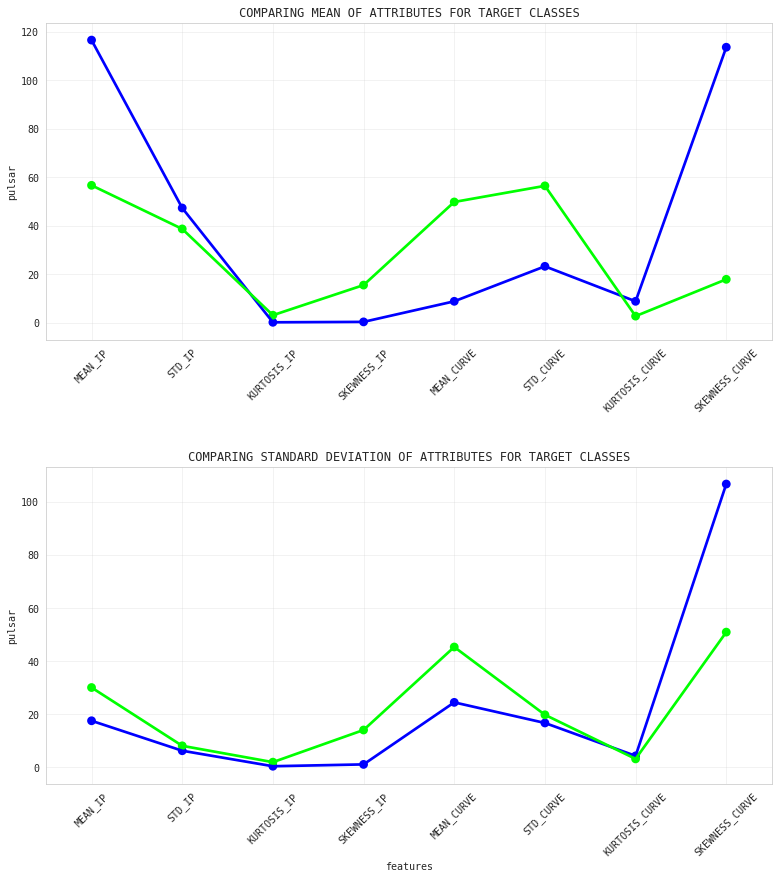

In [14]:
# LINEPLOTS
compare_mean = compare.transpose().reset_index()
compare_mean = compare_mean.rename(columns={'index':"features", 0:"not_pulsar", 1:"pulsar"})
plt.figure(figsize=(13,14))
plt.subplot(211)
sns.pointplot(x="features",y="not_pulsar",data=compare_mean,color="b")
sns.pointplot(x="features",y="pulsar",data=compare_mean,color="lime")
plt.xticks(rotation=45)
plt.xlabel("")
plt.grid(True,alpha=.3)
plt.title("COMPARING MEAN OF ATTRIBUTES FOR TARGET CLASSES")

compare_std = compare1.transpose().reset_index()
compare_std = compare_std.rename(columns={'index':"features", 0:"not_pulsar", 1:"pulsar"})
plt.subplot(212)
sns.pointplot(x="features",y="not_pulsar",data=compare_std,color="b")
sns.pointplot(x="features",y="pulsar",data=compare_std,color="lime")
plt.xticks(rotation=45)
plt.grid(True,alpha=.3)
plt.title("COMPARING STANDARD DEVIATION OF ATTRIBUTES FOR TARGET CLASSES")
plt.subplots_adjust(hspace =.4)
print ("[GREEN == PULSAR , BLUE == NON-PULSAR]")
plt.show()

***************************************
DISTIBUTION OF VARIABLES IN DATA SET
***************************************


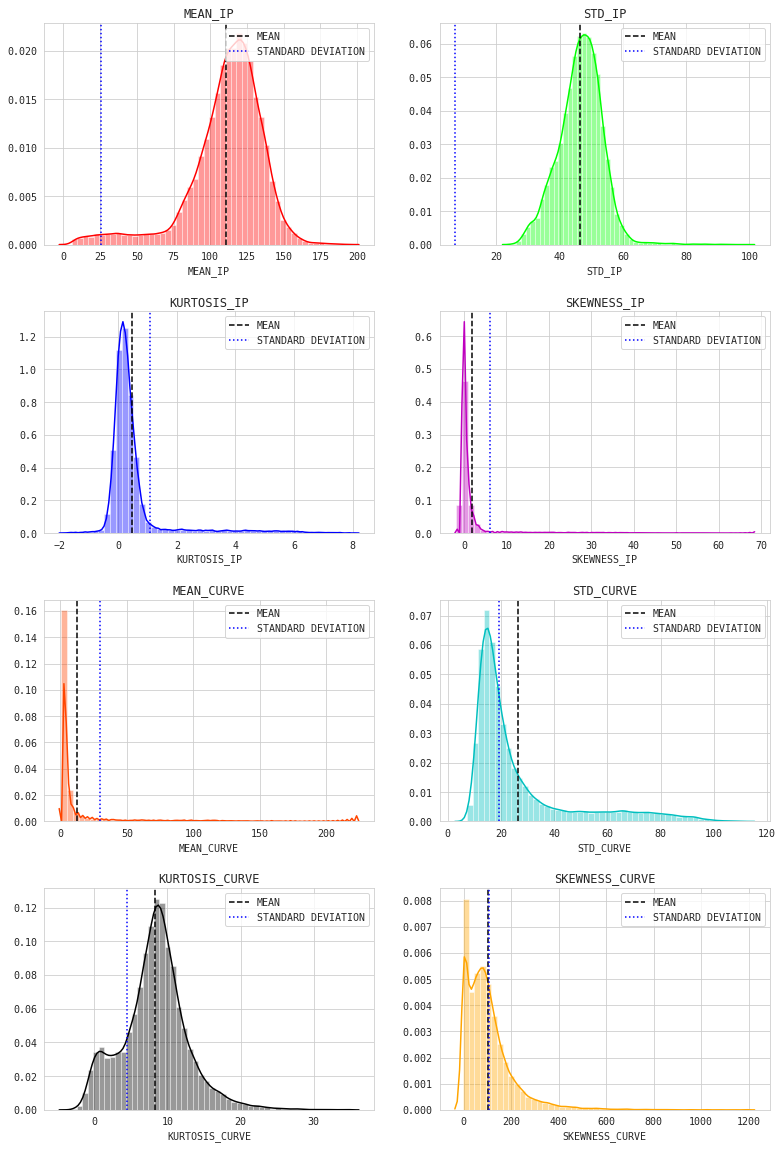

In [15]:
# DISTRIBUTION
import itertools
columns = ['MEAN_IP', 'STD_IP', 'KURTOSIS_IP', 'SKEWNESS_IP',
           'MEAN_CURVE', 'STD_CURVE', 'KURTOSIS_CURVE','SKEWNESS_CURVE']
length  = len(columns)
colors  = ["r","lime","b","m","orangered","c","k","orange"] 

plt.figure(figsize=(13,20))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    plt.subplot(length/2,length/4,j+1)
    sns.distplot(df[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    plt.axvline(df[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    plt.axvline(df[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")
    
print ("***************************************")
print ("DISTIBUTION OF VARIABLES IN DATA SET")
print ("***************************************")

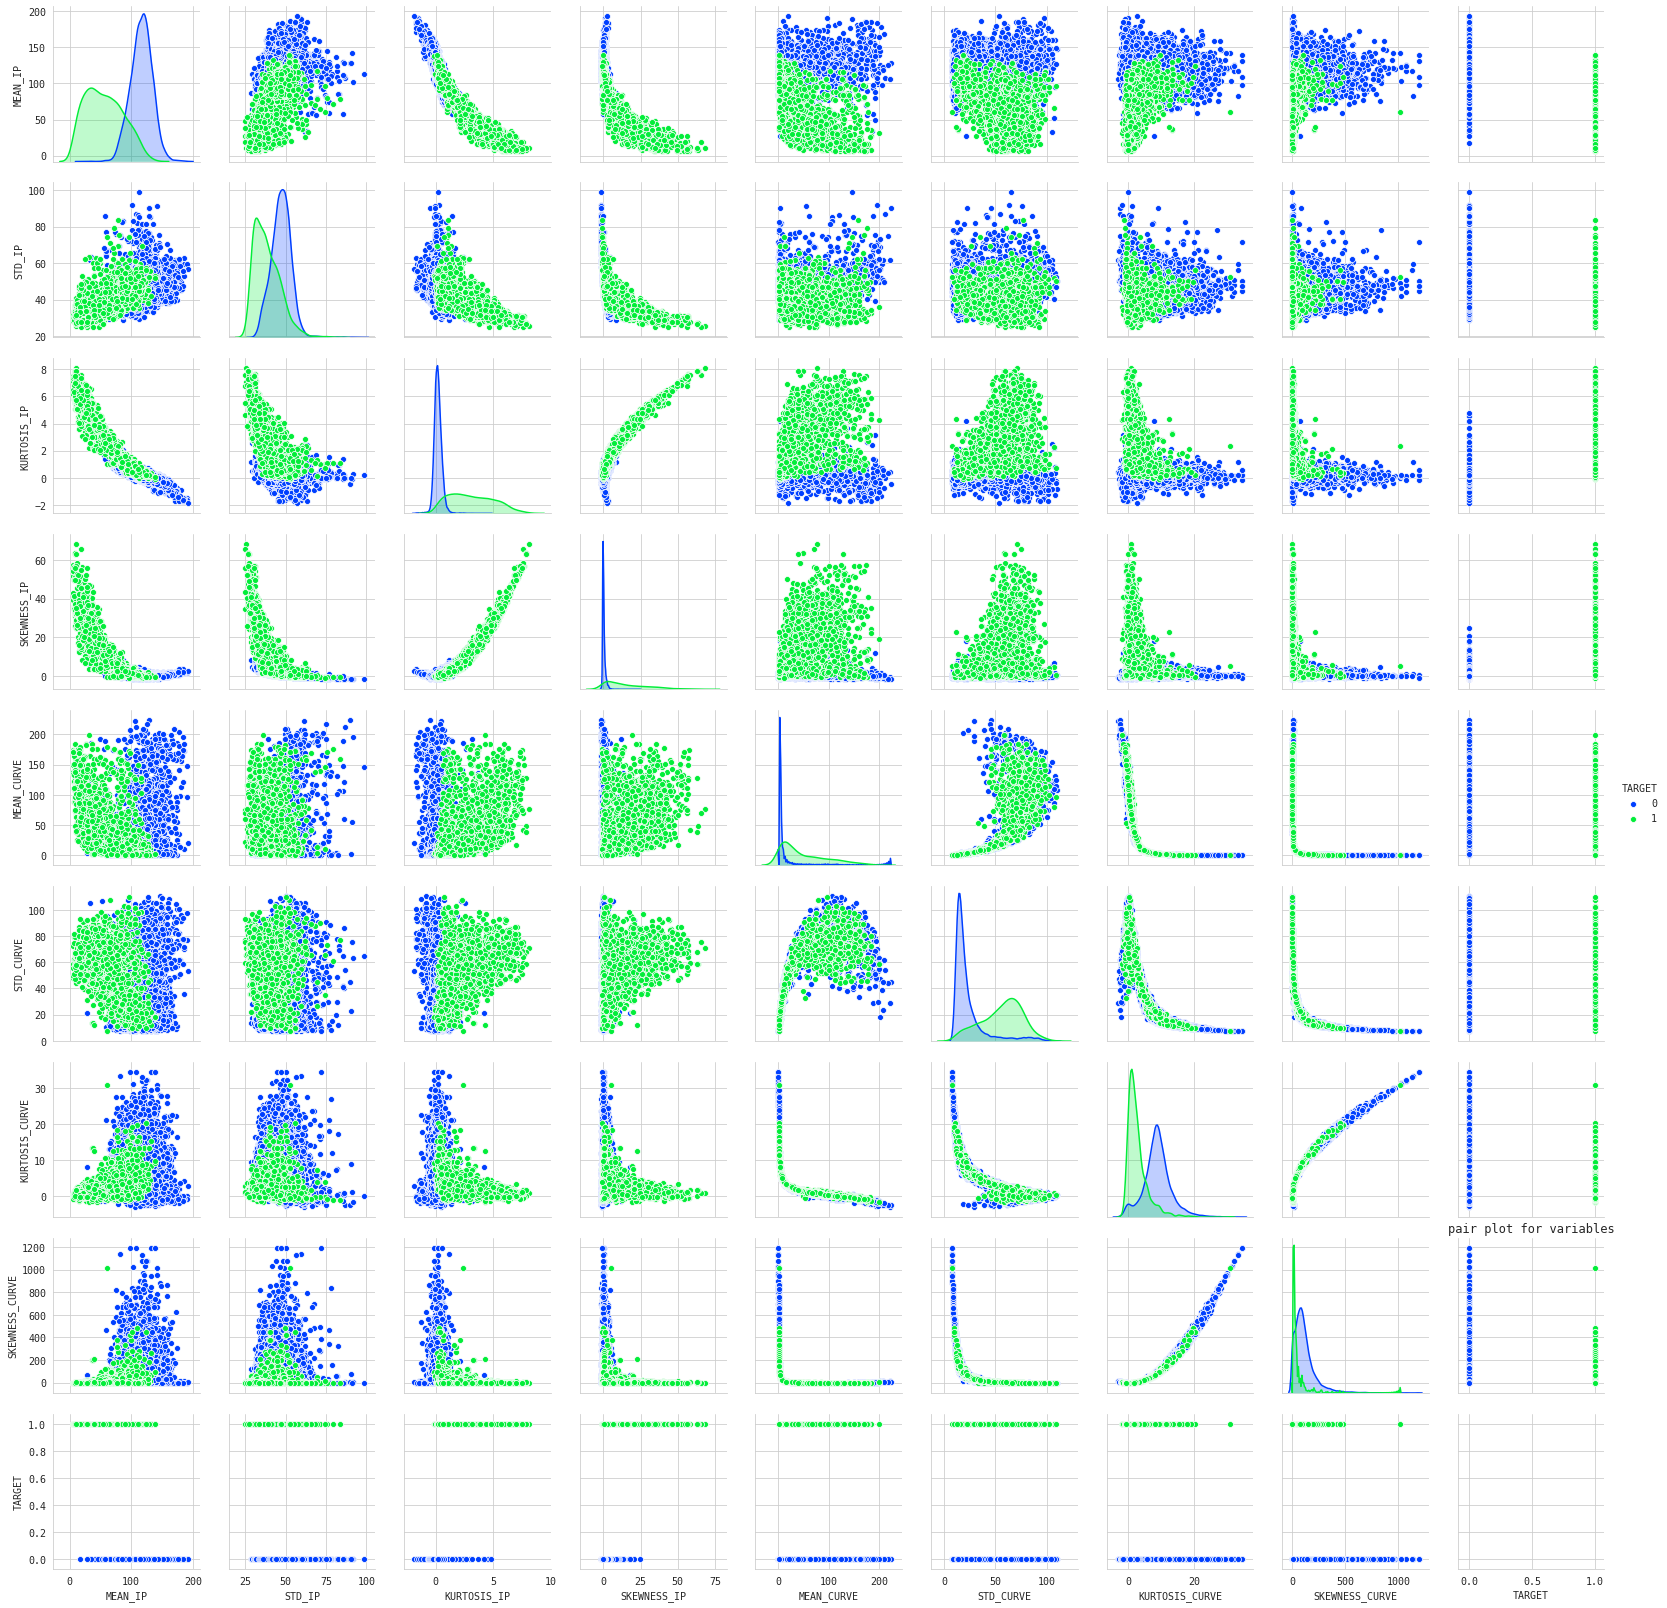

In [16]:
sns.pairplot(df,hue="TARGET")
plt.title("pair plot for variables")
plt.show()

In [17]:
df.columns

Index(['MEAN_IP', 'STD_IP', 'KURTOSIS_IP', 'SKEWNESS_IP', 'MEAN_CURVE',
       'STD_CURVE', 'KURTOSIS_CURVE', 'SKEWNESS_CURVE', 'TARGET'],
      dtype='object')

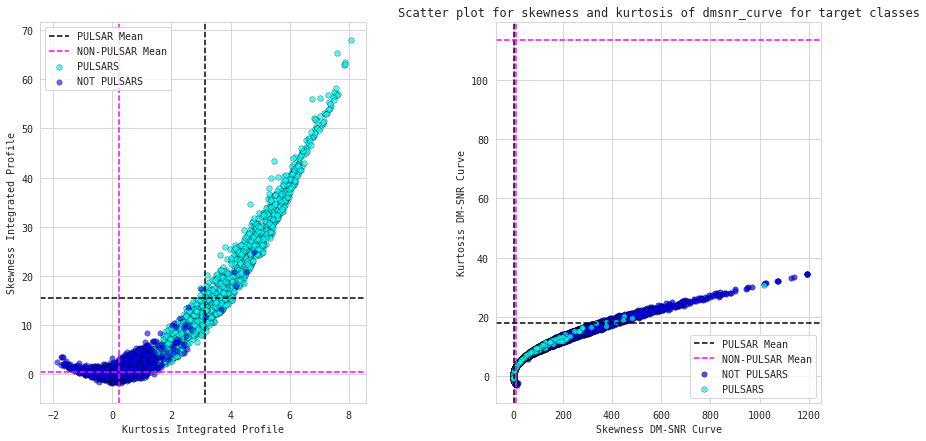

In [18]:
# SCATTERPLOTS
plt.figure(figsize=(14,7))

##### FIRST PLOT
plt.subplot(121)
plt.scatter(x='KURTOSIS_IP',y='SKEWNESS_IP', data=df[df['TARGET'] == 1],alpha=.7,
            label="PULSARS", s=30, color='cyan',linewidths=.4,edgecolors="black")
plt.scatter(x='KURTOSIS_IP',y='SKEWNESS_IP', data=df[df['TARGET'] == 0],alpha=.6,
            label="NOT PULSARS",s=30,color ="b",linewidths=.4,edgecolors="black")
## VLINES
plt.axvline(df[df['TARGET'] == 1]['KURTOSIS_IP'].mean(),
            color = "k",linestyle="dashed",label='PULSAR Mean')
plt.axvline(df[df['TARGET'] == 0]['KURTOSIS_IP'].mean(),
            color = "magenta",linestyle="dashed",label ='NON-PULSAR Mean')
## HLINES
plt.axhline(df[df['TARGET'] == 1]['SKEWNESS_IP'].mean(),
            color = "k",linestyle="dashed")
plt.axhline(df[df['TARGET'] == 0]['SKEWNESS_IP'].mean(),
            color = "magenta",linestyle="dashed")
## LABELS
plt.legend(loc='best')
plt.xlabel("Kurtosis Integrated Profile")
plt.ylabel("Skewness Integrated Profile")
# plt.title("Scatter plot for skewness and kurtosis for target classes")

##### SECOND PLOT
plt.subplot(122)
plt.scatter(x='SKEWNESS_CURVE',y='KURTOSIS_CURVE',data=df[df['TARGET'] == 0],alpha=.7,
            label='NOT PULSARS',s=30,color ="blue",linewidths=.4,edgecolors="black")
plt.scatter(x='SKEWNESS_CURVE',y='KURTOSIS_CURVE',data=df[df['TARGET'] == 1],alpha=.7,
            label="PULSARS",s=30,color = "cyan",linewidths=.4,edgecolors="black")
## VLINES
plt.axvline(df[df['TARGET'] == 1]['KURTOSIS_CURVE'].mean(),
            color = "k",linestyle="dashed",label ="PULSAR Mean")
plt.axvline(df[df['TARGET'] == 0]['KURTOSIS_CURVE'].mean(),
            color = "magenta",linestyle="dashed",label ="NON-PULSAR Mean")
## HLINES
plt.axhline(df[df['TARGET'] == 1]['SKEWNESS_CURVE'].mean(),
            color = "k",linestyle="dashed")
plt.axhline(df[df['TARGET'] == 0]['SKEWNESS_CURVE'].mean(),
            color = "magenta",linestyle="dashed")
## LABELS
plt.legend(loc ="best")
plt.xlabel("Skewness DM-SNR Curve")
plt.ylabel("Kurtosis DM-SNR Curve")
plt.title("Scatter plot for skewness and kurtosis of dmsnr_curve for target classes")
plt.subplots_adjust(wspace =.4)

****************************************************
BOXPLOT FOR VARIABLES IN DATA SET WITH TARGET CLASS
****************************************************


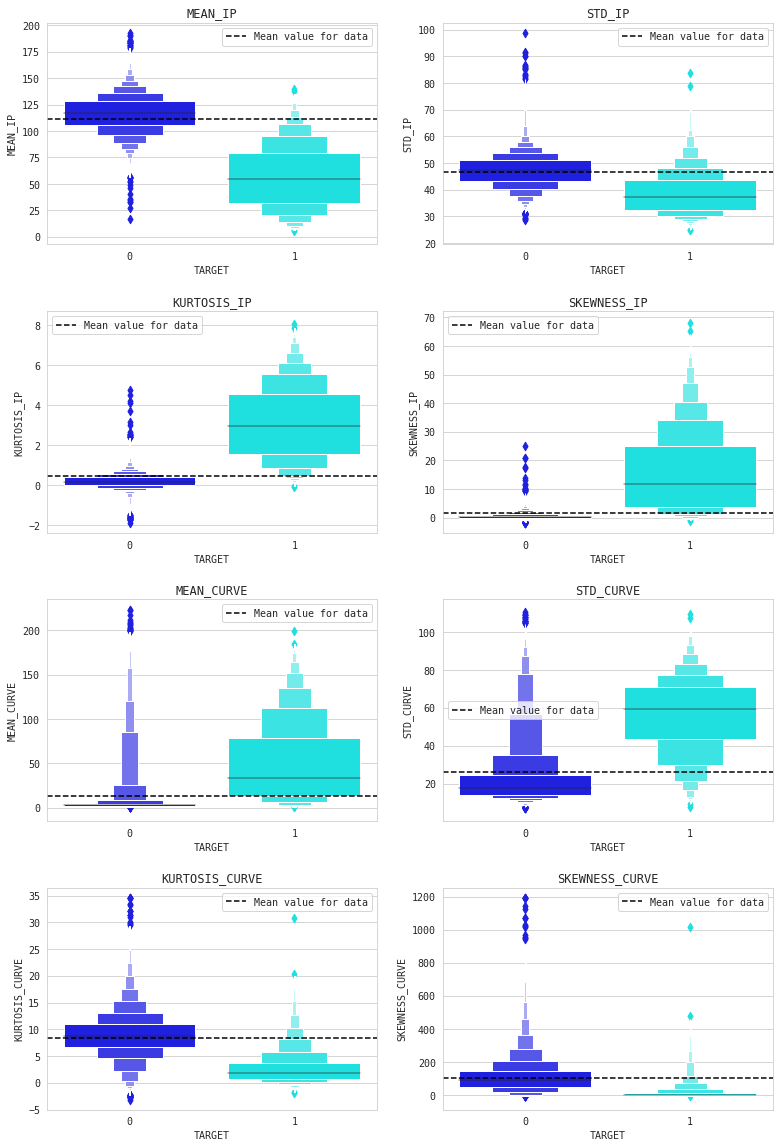

In [19]:
# BOXPLOTS
columns = [x for x in df.columns if x not in ['TARGET']]
length  = len(columns)
plt.figure(figsize=(13,20))
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(4,2,j+1)
    sns.lvplot(x=df['TARGET'],y=df[i],palette=["blue","cyan"])
    plt.title(i)
    plt.subplots_adjust(hspace=.3)
    plt.axhline(df[i].mean(),linestyle = "dashed",color ="k",
                label ="Mean value for data")
    plt.legend(loc="best")
    
print ("****************************************************")
print ("BOXPLOT FOR VARIABLES IN DATA SET WITH TARGET CLASS")
print ("****************************************************")

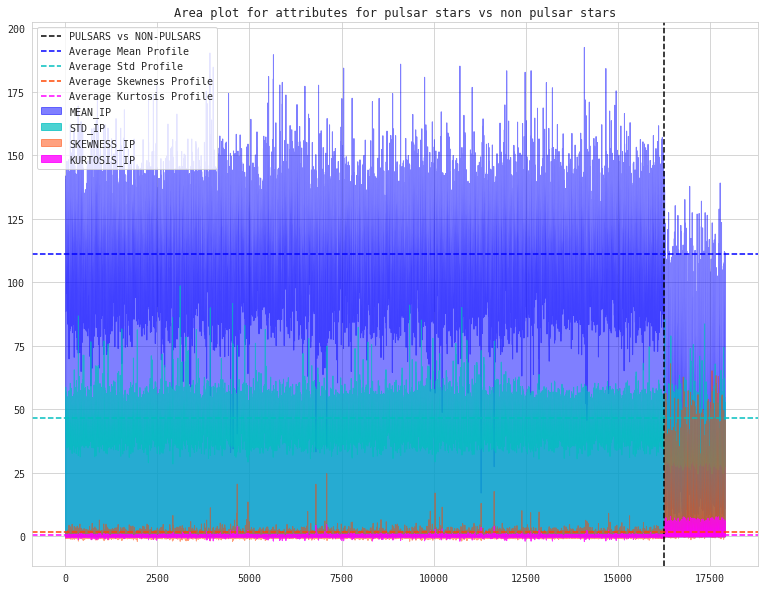

In [20]:
# STACKPLOTS
st = df[df['TARGET'] == 1].reset_index()
nst= df[df['TARGET'] == 0].reset_index()
new = pd.concat([nst,st]).reset_index()

plt.figure(figsize=(13,10))
plt.stackplot(new.index,new['MEAN_IP'],
              alpha =.5,color="b",labels=['MEAN_IP'])
plt.stackplot(new.index,new['STD_IP'],
              alpha=.7,color="c",labels=['STD_IP'])
plt.stackplot(new.index,new['SKEWNESS_IP'],
              alpha=.5,color ="orangered",labels=['SKEWNESS_IP'])
plt.stackplot(new.index,new['KURTOSIS_IP'],
              alpha=.8,color = "magenta",labels=['KURTOSIS_IP'])

plt.axvline(x=16259,color = "black",linestyle="dashed",
            label = "PULSARS vs NON-PULSARS")
plt.axhline(new['MEAN_IP'].mean(),color = "b",
            linestyle="dashed",label = "Average Mean Profile")
plt.axhline(new['STD_IP'].mean(),color = "c",
            linestyle="dashed",label = "Average Std Profile")
plt.axhline(new['SKEWNESS_IP'].mean(),color = "orangered",
            linestyle="dashed",label = "Average Skewness Profile")
plt.axhline(new['KURTOSIS_IP'].mean(),color = "magenta",
            linestyle="dashed",label = "Average Kurtosis Profile")
plt.legend(loc="best")
plt.title("Area plot for attributes for pulsar stars vs non pulsar stars")
plt.show()

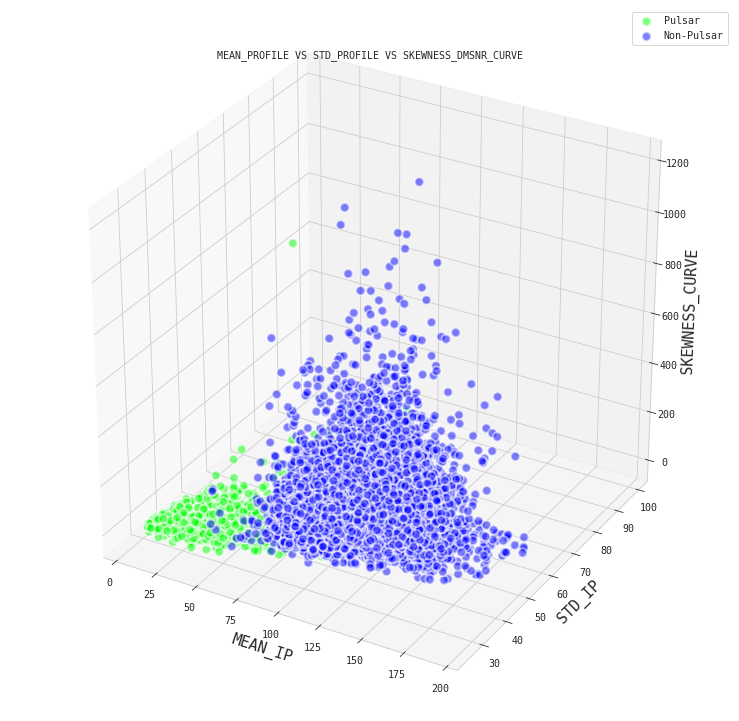

In [21]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(13,13))
ax  = fig.add_subplot(111,projection = "3d")

ax.scatter(df[df["TARGET"] == 1][["MEAN_IP"]],
           df[df["TARGET"] == 1][["STD_IP"]],
           df[df["TARGET"] == 1][["SKEWNESS_CURVE"]],
           alpha=.5, s=80, linewidth=2, edgecolor="w",
           color="lime", label="Pulsar")

ax.scatter(df[df["TARGET"] == 0][["MEAN_IP"]],
           df[df["TARGET"] == 0][["STD_IP"]],
           df[df["TARGET"] == 0][["SKEWNESS_CURVE"]],
           alpha=.5, s=80, linewidth=2, edgecolor="w",
           color="b", label="Non-Pulsar")

ax.set_xlabel("MEAN_IP", fontsize=15)
ax.set_ylabel("STD_IP", fontsize=15)
ax.set_zlabel("SKEWNESS_CURVE",fontsize=15)
plt.legend(loc="best")
fig.set_facecolor("w")
plt.title("MEAN_PROFILE VS STD_PROFILE VS SKEWNESS_DMSNR_CURVE",
          fontsize=10)
plt.show()

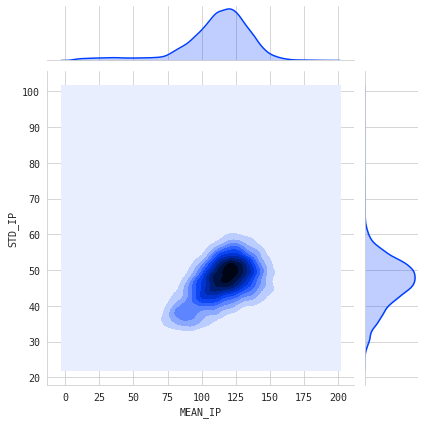

In [22]:
sns.jointplot(df['MEAN_IP'],df['STD_IP'],kind="kde",scale=10)
plt.show()

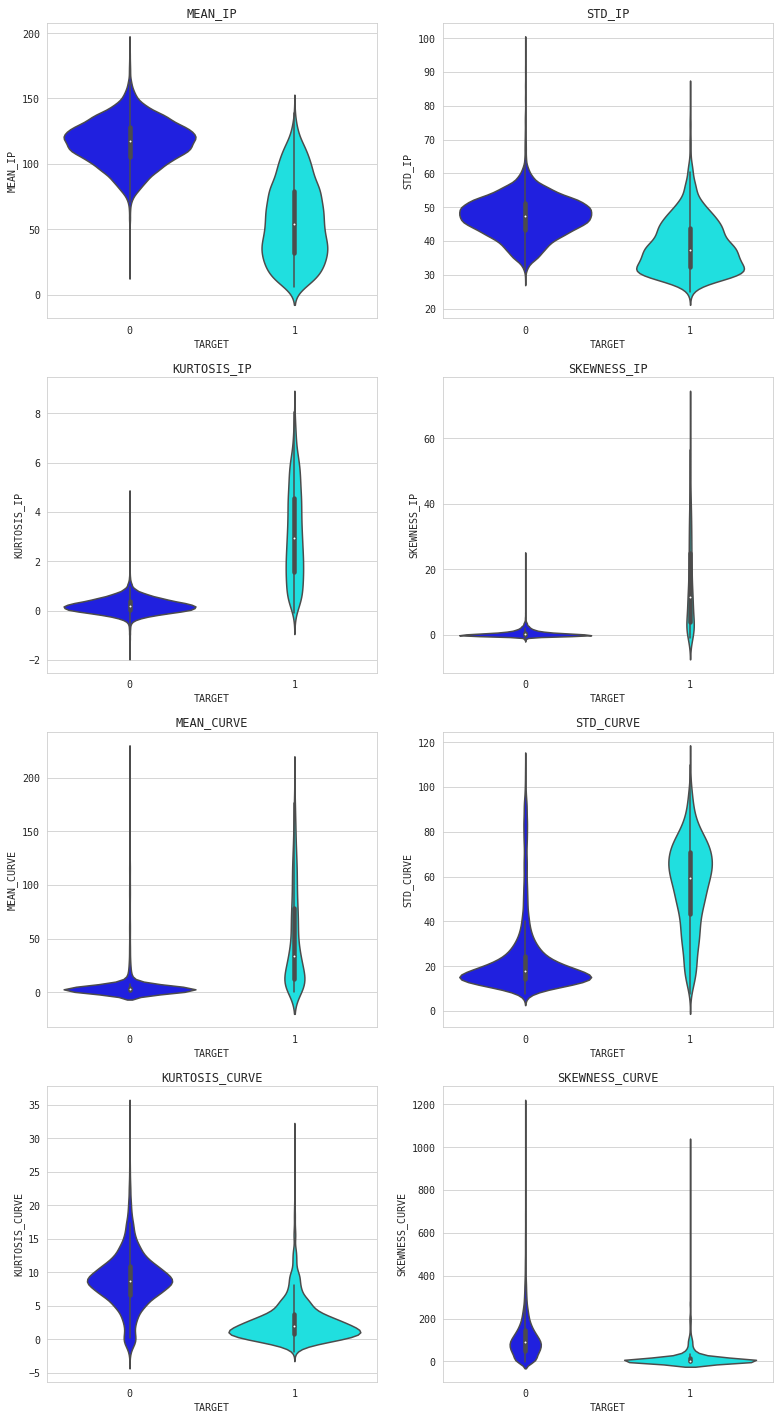

In [23]:
columns = [x for x in df.columns if x not in ['TARGET']]
length  = len(columns)

plt.figure(figsize=(13,25))

for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(length/2,length/4,j+1)
    sns.violinplot(x=df['TARGET'],y=df[i],
                   palette=["blue","cyan"],alpha=.5)
    plt.title(i)

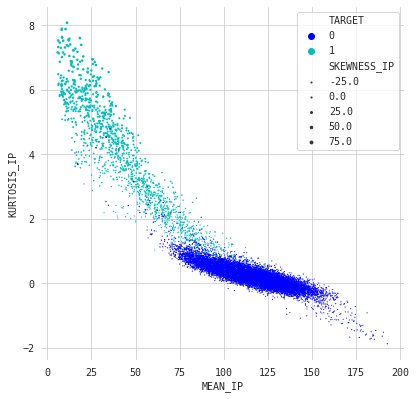

In [24]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x='MEAN_IP', y='KURTOSIS_IP',
                hue='TARGET', size='SKEWNESS_IP',
                palette=['b','c'],
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)


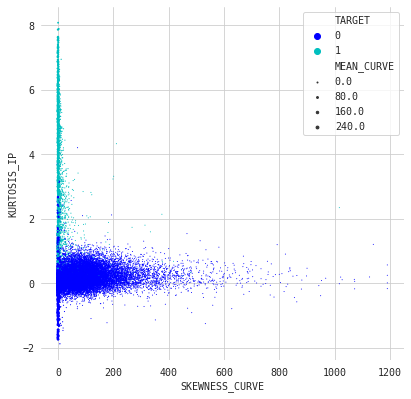

In [25]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x='SKEWNESS_CURVE', y='KURTOSIS_IP',
                hue='TARGET', size='MEAN_CURVE',
                palette=['b','c'],
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)

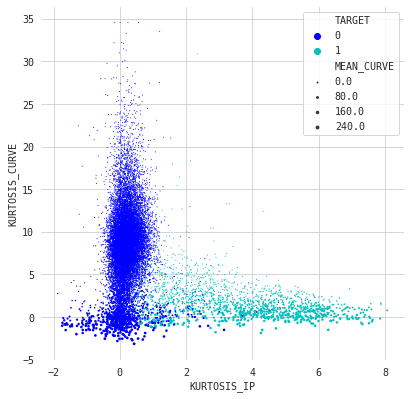

In [26]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x='KURTOSIS_IP', y='KURTOSIS_CURVE',
                hue='TARGET', size='MEAN_CURVE',
                palette=['b','c'],
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)

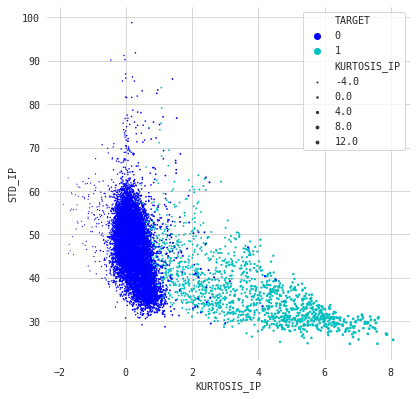

In [27]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x='KURTOSIS_IP', y='STD_IP',
                hue='TARGET', size='KURTOSIS_IP',
                palette=['b','c'],
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)

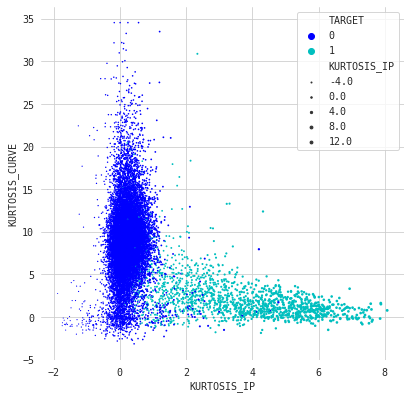

In [28]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x='KURTOSIS_IP', y='KURTOSIS_CURVE',
                hue='TARGET', size='KURTOSIS_IP',
                palette=['b','c'],
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)

# `MODEL`

## Split Data

In [29]:
# create our feature set X and labels y:

y = df['TARGET'].copy()
X = df.drop(columns=['TARGET']).copy()

In [30]:
display(y.shape, X.shape)

(17898,)

(17898, 8)

In [31]:
# We'll do a 75/25 split on the dataset for training/test. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

## Construct Pipelines

1. Scale data using StandardScaler()
2. Construct Pipelines

In [32]:
# logistic regression

pipe_lr = Pipeline([('scl', StandardScaler()),
                   ('pca', PCA(n_components=2)),
                   ('clf', LogisticRegression(class_weight='balanced'))])

# support vector
pipe_svm = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', svm.SVC(class_weight='balanced'))])


# decision tree
pipe_dt = Pipeline([('scl', StandardScaler()),
                   ('pca', PCA(n_components=2)),
                    ('clf', tree.DecisionTreeClassifier(class_weight='balanced'))])

# xgboost

pipe_xgb = Pipeline([('xgb', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                     ('clf', XGBClassifier(class_weight='balanced'))])

In [33]:
# List of pipelines for ease of iteration

pipelines = [pipe_lr, pipe_svm, pipe_dt, pipe_xgb]

In [34]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Support Vector Machine', 2: 'Decision Tree', 3: 'XG Boost'}


In [35]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [36]:
# Compare accuracies

for idx, val in enumerate(pipelines):
    print('%s pipeline training accuracy: %.3f' % (pipe_dict[idx], val.score(X_train, y_train)))
    print('%s pipeline test accuracy: %.3f' % (pipe_dict[idx], val.score(X_test, y_test)))

Logistic Regression pipeline training accuracy: 0.936
Logistic Regression pipeline test accuracy: 0.939
Support Vector Machine pipeline training accuracy: 0.957
Support Vector Machine pipeline test accuracy: 0.957
Decision Tree pipeline training accuracy: 1.000
Decision Tree pipeline test accuracy: 0.960
XG Boost pipeline training accuracy: 0.976
XG Boost pipeline test accuracy: 0.973


In [37]:
# Identify the most accurate model on test data
best_acc = 0.0
best_clf = 0
best_pipe = ''


for idx, val in enumerate(pipelines):
    if val.score(X_test, y_test) > best_acc:
        best_acc = val.score(X_test, y_test)
        best_pipe = val
        best_clf = idx
        
print('Classifier with best accuracy: %s' % pipe_dict[best_clf])

# Save pipeline to file
joblib.dump(best_pipe, 'best_pipeline.pkl', compress=1)
print('Saved %s pipeline to file' % pipe_dict[best_clf])

Classifier with best accuracy: XG Boost
Saved XG Boost pipeline to file


# `XG Boost`

Moving ahead with XG Boost

In [38]:
# Standardize the data
std = StandardScaler()
X_train_transformed = std.fit_transform(X_train)
X_test_transformed = std.transform(X_test)

In [39]:
# Fit XG Boost model  
# ⏰ This cell takes several minutes to run

# Instantiate XGBClassifier with balanced class weights
clf = XGBClassifier(class_weight='balanced')

# Fit XGBClassifier
clf.fit(X_train_transformed, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [40]:
# Predict on training and test sets
training_preds = clf.predict(X_train_transformed)
test_preds = clf.predict(X_test_transformed)

In [41]:
# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))


Training Accuracy: 98.4%
Validation accuracy: 98.0%


## GridSearchCV

Tuning XG Boost with a parameter Gridsearch

In [42]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [43]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train_transformed, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train_transformed)
test_preds = grid_clf.predict(X_test_transformed)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 2
n_estimators: 100
subsample: 0.5

Training Accuracy: 98.82%
Validation accuracy: 97.92%


## Evaluate Model

### AUC

In [44]:
# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, test_preds)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))



AUC is :0.92


### Confusion matrix

In [45]:
# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,5295,41,5336
1,82,489,571
All,5377,530,5907


In [46]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print confusion matrix
cnf_matrix = confusion_matrix(y_test, test_preds)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[5295   41]
 [  82  489]]


In [47]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',cmap='magma'):
                          #cmap=plt.cm.Blues):
    
    import itertools
    # Check if normalize is set to True
    # If so, normalize the raw confusion matrix before visualizing
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    
    fig, ax = plt.subplots(figsize=(10,10))
    #mask = np.zeros_like(cm, dtype=np.bool)
    #idx = np.triu_indices_from(mask)
    
    #mask[idx] = True

    plt.imshow(cm, cmap=cmap, aspect='auto')
    
    # Add title and axis labels 
    plt.title('Confusion Matrix') 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label')
    
    # Add appropriate axis scales
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    ax.set_ylim(len(cm), -.5,.5)
    
    # Text formatting
    fmt = '.2f' if normalize else 'd'
    # Add labels to each cell
    thresh = cm.max() / 2.
    # iterate thru matrix and append labels  
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='black' if cm[i, j] > thresh else 'white')
    
    # Add a legend
    plt.colorbar()
    plt.show() 

Normalized confusion matrix


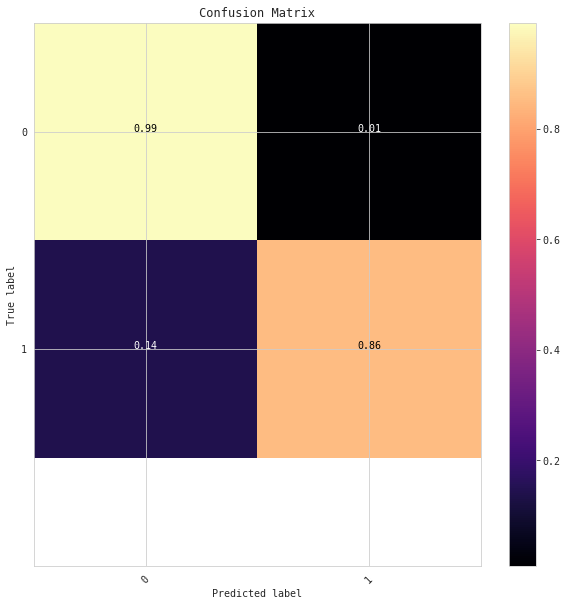

In [48]:
# Plot normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=set(y), normalize=True,
                      title='Normalized confusion matrix')

Confusion matrix, without normalization


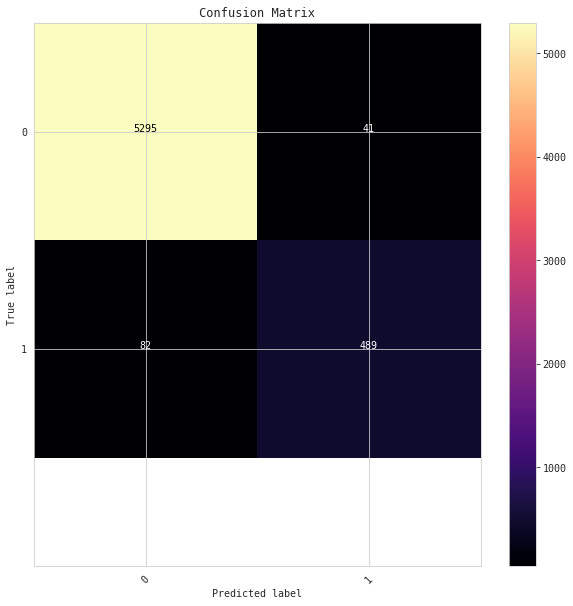

In [49]:
# Plot normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=set(y), normalize=False,
                      title='Normalized confusion matrix')

----------------------------------------------
AUC for 0.005: 0.9248228337670045
----------------------------------------------
AUC for 0.1: 0.9248228337670045
----------------------------------------------
AUC for 0.2: 0.9248228337670045
----------------------------------------------
AUC for 0.3: 0.9248228337670045
----------------------------------------------
AUC for 0.5: 0.9248228337670045
----------------------------------------------
AUC for 0.6: 0.9248228337670045
----------------------------------------------
AUC for 0.7: 0.9248228337670045
----------------------------------------------
AUC for 0.8: 0.9248228337670045


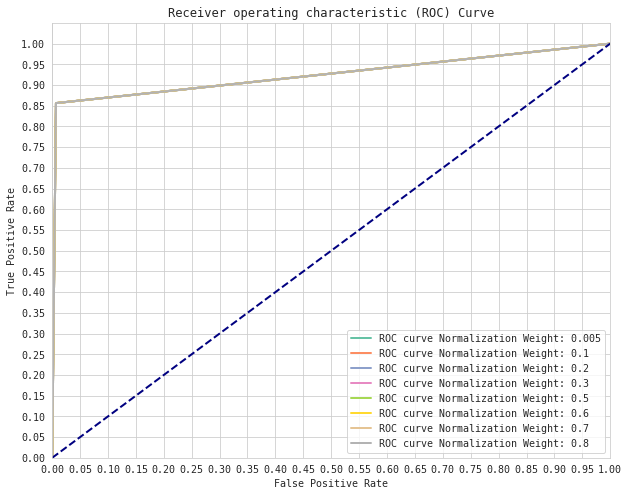

In [50]:
# compare a few different regularization performances on the dataset:
C_param_range = [0.005, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8]
names = [0.005, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9]
colors = sns.color_palette('Set2', n_colors=len(names))

plt.figure(figsize=(10, 8))

for n, c in enumerate(C_param_range):
    # Fit a model
    # Instantiate and fit a DecisionTreeClassifier
    #tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)
    #model_tree = tree_clf.fit(X_train, y_train)

    # Predict
    #y_pred = tree_clf.predict(X_test)
    y_pred = clf.predict(X_test_transformed)
    y_score = accuracy_score(y_test, y_pred)
    
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    #roc_auc = auc(fpr, tpr)
    print('----------------------------------------------')
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Normalization Weight: {}'.format(names[n]))
    
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# Make predictions and evaluate 

print('MSE score:', mse(y_test, y_pred))
print('R-sq score:', r2_score(y_test,y_pred))

MSE score: 0.019976299305908246
R-sq score: 0.7712310657280816


In [52]:
# Feature importance
clf.feature_importances_

array([0.0296288 , 0.04946927, 0.6965566 , 0.0334212 , 0.03007143,
       0.09773643, 0.04146607, 0.02165021], dtype=float32)

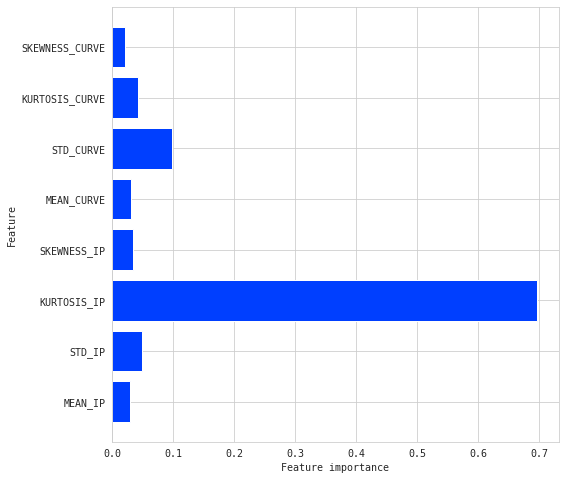

In [53]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(clf)

In [54]:
print("Testing Accuracy for XG Boost Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

NameError: name 'pred' is not defined

In [ ]:
def modelX(algorithm, X_train, y_train, X_test, y_test, of_type):
    
    print ("**********"*7)
    print ("MODEL X")
    print ("**********"*7)
    algorithm.fit(X_train, y_train)
    y_pred = algorithm.predict(X_test)
    
    print (algorithm)
    print ("\n accuracy_score :", accuracy_score(y_test, y_pred))
    
    print ("\nclassification report :\n",(classification_report(y_test, y_pred)))
        
    plt.figure(figsize=(13,10))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title("CONFUSION MATRIX",fontsize=20)
    
    pred_probs = algorithm.predict_proba(X_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y_test, pred_probs)
    plt.subplot(222)
    plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
    plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
    plt.legend(loc = "best")
    plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)
    
    if of_type == "feat":
        
        dataframe = pd.DataFrame(algorithm.feature_importances_, X_train.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(223)
        ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("FEATURE IMPORTANCES",fontsize =20)
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(.011,i,j,weight = "bold")
    
    elif of_type == "coef":
        try:
            dataframe = pd.DataFrame(algorithm.coef_.ravel(), X_train.columns).reset_index()
            dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
            dataframe = dataframe.sort_values(by="coefficients",ascending = False)
            plt.subplot(223)
            ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
            plt.title("FEATURE IMPORTANCES",fontsize =20)
            for i,j in enumerate(dataframe["coefficients"]):
                ax.text(.011,i,j,weight = "bold")
        except:
            print(f"{0} has no coef argument", str(algorithm))
            


In [ ]:
modelX(clf, X_train_transformed, y_train, X_test_transformed, y_test, "coef")

# `Interpret Results`

In [ ]:

preds = pd.Series(test_preds)
preds.value_counts()

In [ ]:
from xgboost import plot_importance, plot_tree

from sklearn.model_selection import cross_val_score

In [ ]:
xgb_cv_score = cross_val_score(clf, X_train_transformed, y_train, cv=3)
mean_xgb_cv_score = np.mean(xgb_cv_score)

print(f"Mean Cross Validation Score: {mean_xgb_cv_score :.2%}")

# `CONCLUSION`

With 98% accuracy, we were able to identify 431 pulsars, missing only 68 that we our model mistakenly identified as noise.

# `FUTURE WORK`

1. Continue to improve accuracy of model by further tuning parameters.

2. Test out model with additional and larger datasets.

3. Identify new and interesting data about pulsars and black holes.